2018/10/28

# 第五章　GLMの尤度比検定と検定の非対称性

## 尤度比検定実践　withNeyman-Pearson検定

In [1]:
d <- read.csv("./data/data3a.csv")
head(d)

y,x,f
6,8.31,C
6,9.44,C
6,9.50,C
12,9.07,C
10,10.16,C
4,8.32,C


In [8]:
#一定モデル
fit1 <- glm(y~1,data=d,family=poisson)
summary(fit1)


Call:
glm(formula = y ~ 1, family = poisson, data = d)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.49013  -0.68232   0.06054   0.74327   2.27214  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.05796    0.03574   57.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 89.507  on 99  degrees of freedom
AIC: 477.29

Number of Fisher Scoring iterations: 4


In [9]:
#xモデル
fit2 <- glm(y~x,data=d,family=poisson)
summary(fit2)


Call:
glm(formula = y ~ x, family = poisson, data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3679  -0.7348  -0.1775   0.6987   2.3760  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.29172    0.36369   3.552 0.000383 ***
x            0.07566    0.03560   2.125 0.033580 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 84.993  on 98  degrees of freedom
AIC: 474.77

Number of Fisher Scoring iterations: 4


In [10]:
#尤度比=逸脱度の差
fit1$deviance - fit2$deviance

[1] 4.513941

逸脱度の差が4.5という値はつまり一定モデルに比べてxモデルは逸脱度が4.6改善したということ。<br>
尤度比検定では改善したと言って良いのかどうかを検定したい<br>

<strong>帰無仮説</strong><br>
一定モデルの方がいい<br>
<strong>対立仮説</strong><br>
xモデルの方がいい

### 方法１）汎用性のあるパラメトリックブートストラップ法

In [12]:
#逸脱度の差の分布を予測
get.dd <- function(d)
    {
    n.sample <- nrow(d)
    y.mean <- mean(d$y)
    d$y.rnd <- rpois(n.sample, lambda=y.mean)
    fit1 <- glm(y.rnd~1,data=d,family=poisson)
    fit2 <- glm(y.rnd~x,data=d,family=poisson)
    fit1$deviance - fit2$deviance 
}
pb <- function(d,n.bootstrap){
    replicate(n.bootstrap,get.dd(d))
}

dd12 <- pb(d,n.bootstrap=1000)

In [15]:
summary(dd12)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00000  0.08964  0.41451  0.94118  1.18732 19.38827 

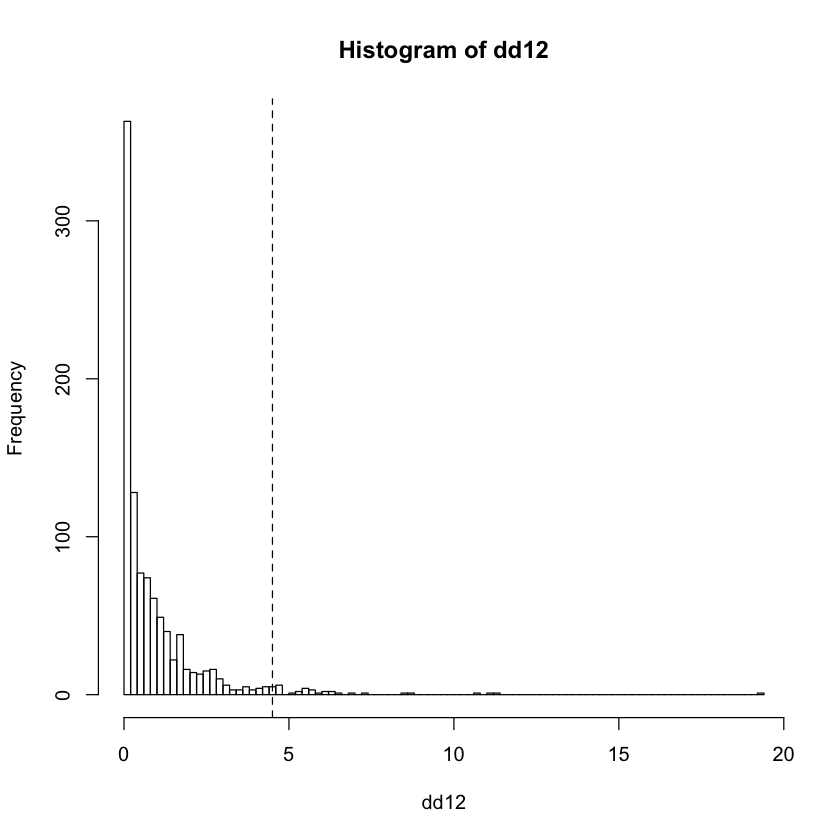

In [16]:
hist(dd12,100)
abline(v=4.5,lty=2)

In [17]:
sum(dd12 >=4.5)

[1] 32

合計1000個あるデータのうち線より右側のデータは32個より、

In [30]:
p = 38/1000
p

[1] 0.038

p値は0.038より、有意水準5%とすると

In [31]:
quantile(dd12,0.95)

95% 
3.669097

0.038は3.95より小さいので4.5になるというのはとても珍しいこと。だから、帰無仮説は<strong>棄却</strong>される。<br>

<strong>結論</strong><br>
帰無仮説は棄却され、xモデルが残るので採択される

### カイ２乗分布を使った近似計算法

In [32]:
anova(fit1,fit2,test="Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
99,89.50694,NA,NA,NA
98,84.99300,1,4.513941,0.03361969


逸脱度の差の分布を自由度１のカイ２乗分布と近似するとすると、逸脱度が4.5になるp値は0.03361969なので５より小さいので帰無仮説は棄却。<br>

カイ２乗分布はサンプルサイズが大きい時にのみ有効

## AICと検定の違い

<strong>AIC</strong><br>
予測の良さとは平均対数尤度と明示した上でいい予測をするモデルかどうかを判断<br>

<strong>検定</strong><br>
帰無仮説の安全な棄却。帰無仮説が棄却された後に残された対立仮説がどのような意味でいいモデルなのかは明確でない